# Credit Card Fraud Detection by using PyCaret Auto ML

<img src="https://www.transunion.com/blog/identity-protection/most-common-purchases-with-stolen-credit-card-information/_jcr_content/root/pagesection_1639233989/image.coreimg.75.1440.jpeg/1637192300950/b-most-common-purchases-with-stolen-credit-card-information-header-d.jpeg">

#### In this project we will be will be using Auto ML Technique tby using PyCaret in this notebook. PyCaret is most advance library to develop ML models.

## Overview
### The agenda is that credit card companies are able to recognize fraud credit card transactions.

### Customer should not charged for fraud transactions.

## Content
### The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


## In this notebook we will perform the following task: 
- Data Analysis
- Model Building and Prediction using PyCaret(Auto ML)

### Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Libraries for Outlier Detection

In [16]:
from sklearn.ensemble import IsolationForest

from sklearn.svm import OneClassSVM

### Reading our Dataset

In [28]:
df= pd.read_csv("creditcard.csv")

In [29]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Analysis

In [30]:
df.shape

(284807, 31)

#### Checking Null Values

In [31]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Checking the distribution of Normal and Fraud cases in our Data Set

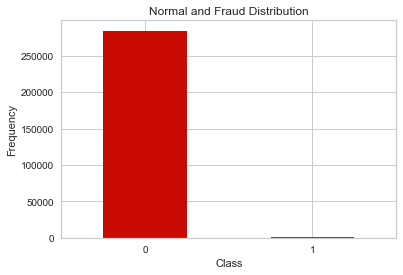

In [19]:
fraud_check = pd.value_counts(df['Class'], sort = True)
fraud_check.plot(kind = 'bar', rot=0, color= 'r')
plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
 ## Defining labels to replace our 0 and 1 valuelabels= ['Normal','Fraud']
## mapping those labels
plt.xticks(range(2))
plt.show()


#### Let us see what is the shape of Normal and Fraud data set

In [32]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [33]:
fraud_people.shape

(492, 31)

In [34]:
normal_people.shape

(284315, 31)

#### Finding out the avg amount in our both the data sets

In [35]:
fraud_people['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [36]:
normal_people['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#### Let us analyse it visually

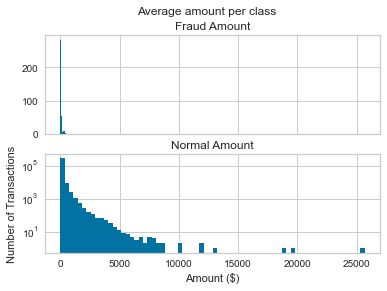

In [37]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

#### Plotting a corr Heatmap

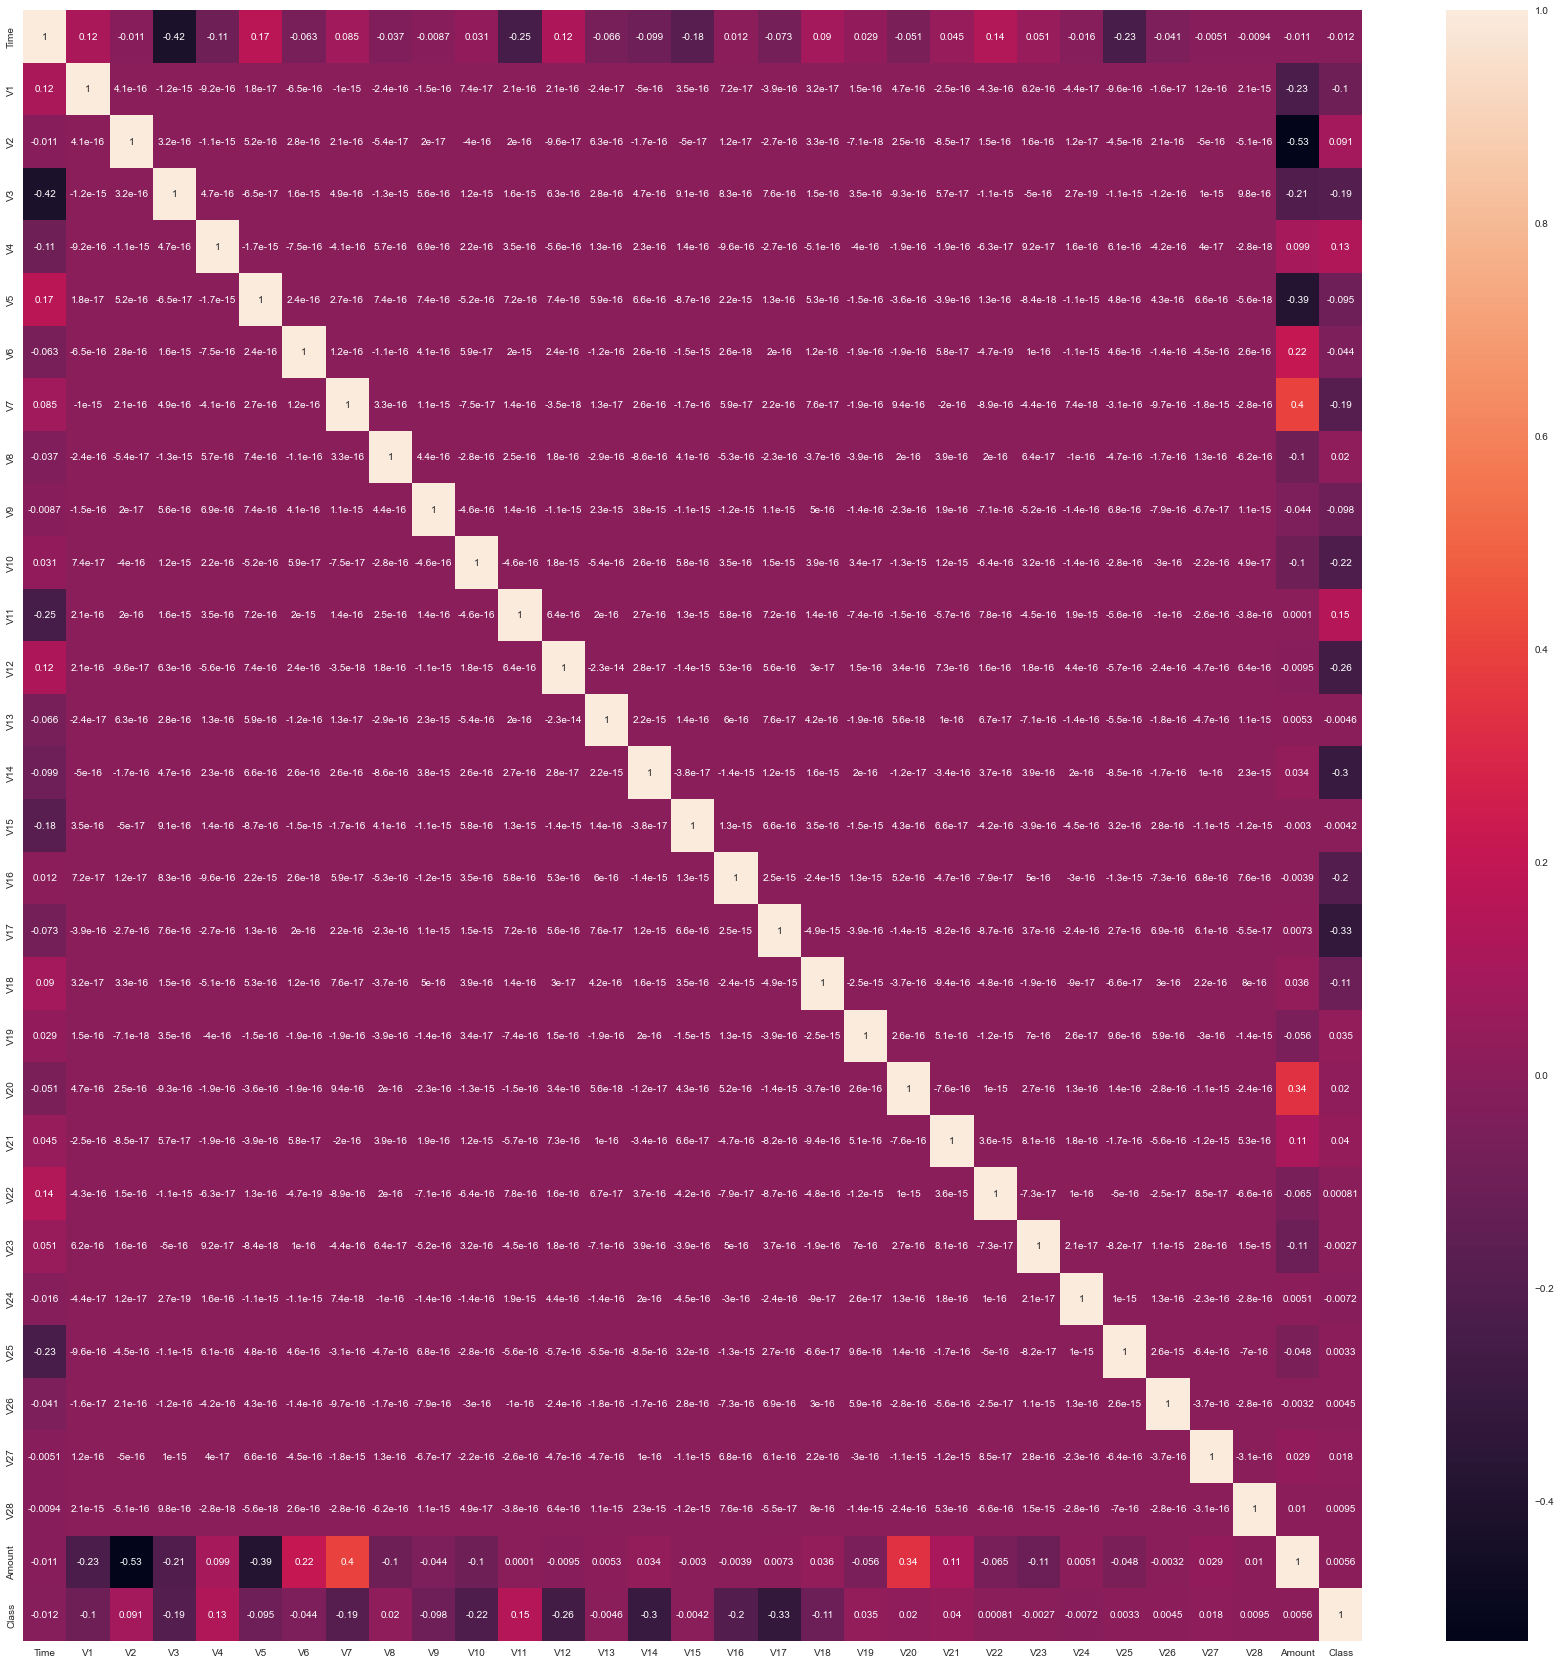

In [38]:
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True)

### Creating our Dependent and Independent Features

In [39]:
columns = df.columns.tolist()
# Making our Independent Features
columns = [var for var in columns if var not in ["Class"]]
# Making our Dependent Variable
target = "Class"
x= df[columns]
y= df[target]

In [40]:
x.shape

(284807, 30)

In [41]:
y.shape

(284807,)

In [42]:
x.head() ## Independent Variable

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [43]:
y.head() ## Dependent Variable

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Model building

### Splitting the data

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Solving the Problem Statement using PyCaret Library(Auto ML)

# PyCaret :

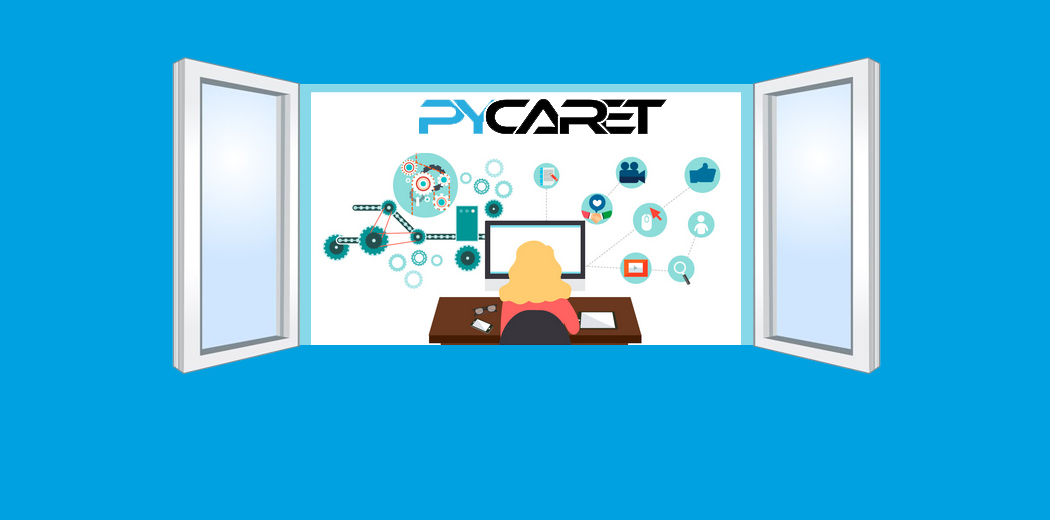

### PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

### Installing Pycaret

In [1]:
! pip install pycaret

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 167.1/167.1 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 24.2/24.2 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 152.9/152.9 kB 3.0 MB/s eta 0:00:00
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
     ---------------------------------------- 15.2/15.2 MB 3.0 MB/s eta 0:00:00
  Using cached mlxtend-0.20.0-py2.py3-none-any.whl (1.3 MB)
     ---------------------------------------- 6.8/6.8 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 9.7/9.7 MB 3.0 MB/s eta 

     -------------------------------------- 151.5/151.5 kB 1.8 MB/s eta 0:00:00
  Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
  Using cached websocket_client-1.3.3-py3-none-any.whl (54 kB)
     ---------------------------------------- 9.1/9.1 MB 3.6 MB/s eta 0:00:00
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
     -------------------------------------- 425.3/425.3 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 4.6/4.6 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 991.9/991.9 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 246.8/246.8 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 132.1/132.1 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 100.8/100.8 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 61.2/61.2 kB 3.2 MB/s eta 0:00:00
     -------------------------------------- 139.9/139.9 kB 2.8 MB/s eta 0:00:00
     ----------------------------

In [1]:
from pycaret.utils import version
version()

'2.3.10'

In [5]:
df= pd.read_csv("creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
from pycaret.classification import *

In [8]:
model= setup(data= df, target= 'Class')

,Description,Value
0,session_id,7245
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9377,0.7788,0.9532,0.8546,0.8544,0.8600,70.4630
et,Extra Trees Classifier,0.9996,0.9450,0.7818,0.9539,0.8569,0.8567,0.8621,11.6160
lda,Linear Discriminant Analysis,0.9994,0.8923,0.7545,0.8601,0.8018,0.8015,0.8042,1.1050
dt,Decision Tree Classifier,0.9992,0.8771,0.7545,0.7565,0.7542,0.7538,0.7545,6.7740
ada,Ada Boost Classifier,0.9992,0.9765,0.6788,0.8039,0.7339,0.7335,0.7372,24.2880
lr,Logistic Regression,0.9991,0.9399,0.6000,0.8324,0.6948,0.6944,0.7050,5.3390
gbc,Gradient Boosting Classifier,0.9990,0.6723,0.5061,0.8144,0.6090,0.6086,0.6331,121.0940
ridge,Ridge Classifier,0.9989,0.0000,0.4212,0.8425,0.5505,0.5501,0.5883,0.1390
knn,K Neighbors Classifier,0.9984,0.5955,0.0455,0.8000,0.0859,0.0857,0.1895,2.6810
svm,SVM - Linear Kernel,0.9983,0.0000,0.0000,0.0000,0.0000,-0.0001,-0.0003,3.1900


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7245, verbose=0,
                       warm_start=False)

## We use Random Forest for the model building

In [10]:
random_forest= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9996,0.8918,0.7576,1.0000,0.8621,0.8619,0.8702
1,0.9997,0.9533,0.8182,1.0000,0.9000,0.8999,0.9044
2,0.9994,0.9224,0.7576,0.8621,0.8065,0.8062,0.8078
3,0.9996,0.9224,0.7879,0.9630,0.8667,0.8665,0.8708
4,0.9994,0.9054,0.6364,1.0000,0.7778,0.7775,0.7975
5,0.9999,0.9845,0.9394,1.0000,0.9688,0.9687,0.9692
6,0.9996,0.9688,0.8485,0.9333,0.8889,0.8887,0.8897
7,0.9995,0.9378,0.7273,0.9600,0.8276,0.8273,0.8353
8,0.9993,0.9067,0.6667,0.8800,0.7586,0.7583,0.7656


### As we see we have a very good Kappa score which is often seen in an Imbalanced dataset

In [11]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7245, verbose=0,
                       warm_start=False)

## Predictions

In [23]:
pred_holdout = predict_model(random_forest,data= x_test)

In [24]:
pred_holdout

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Label,Score
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,0.99
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,1.00
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,1.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,1.00
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180795,124702.0,-0.673320,1.823100,-2.152665,-1.051308,1.822568,1.319646,-0.228012,-1.743339,-0.665095,...,-0.929823,0.561185,2.970343,-0.632171,0.095316,0.031770,0.093565,3.99,0,1.00
259979,159354.0,2.125553,-0.065046,-1.537467,0.125578,0.500319,-0.359530,0.124248,-0.201678,0.551045,...,-0.878330,0.281129,0.035931,-0.173013,0.207555,-0.075438,-0.060078,1.79,0,1.00
21885,31911.0,0.746800,-1.028053,1.127833,1.631418,-1.193487,0.946088,-0.857322,0.480905,1.662617,...,0.058198,-0.235697,-0.457910,0.328226,-0.219767,0.058352,0.058441,195.60,0,1.00
217812,141043.0,2.080547,0.167780,-1.722107,0.403323,0.451991,-0.848388,0.190703,-0.239152,0.481197,...,-0.945073,0.332659,0.484916,-0.246959,0.174693,-0.061887,-0.030910,0.89,0,1.00


In [25]:
pred_holdout_train = predict_model(random_forest,data= x_train)

In [26]:
pred_holdout_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Label,Score
2557,2105.0,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,...,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,1.00,0,1.0
247823,153702.0,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,...,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,1194.28,0,1.0
152342,97283.0,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,...,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,75.00,0,1.0
103385,68628.0,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,...,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,1.98,0,1.0
8771,11951.0,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,...,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,37.31,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0,1.0
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0,1.0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0,1.0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0,1.0


# Findings

- PyCaret handled the imbalanced data in a very effective way.
- Model Accuracy is 99%
- Kappa scored 85% 